In [ ]:
import csv
import random
import shutil
import os
import pandas as pd
import numpy as np
from PIL import Image
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
street_id_df = pd.read_csv("/content/drive/MyDrive/GEOG0105/id_semantic_score.csv")

In [ ]:
import os
import shutil
import pandas as pd

source_folder = "/content/drive/MyDrive/GEOG0105/GSV_final"
target_folder = "/content/drive/MyDrive/GEOG0105/Output_1/Validation/GSV_validation"
os.makedirs(target_folder, exist_ok=True)

random_seed = 42

validation_samples = (
    street_id_df.groupby("lsoa21cd", group_keys=False)
    .apply(lambda x: x.sample(n=2, random_state=random_seed) if len(x) >= 2 else x)
    .reset_index(drop=True)
)

print(f"{len(validation_samples)} ")

missing_files = []

for idx, row in validation_samples.iterrows():
    gid = row["id"]
    lsoa = row["lsoa21cd"]

    for angle in range(4):
        source_file = os.path.join(source_folder, f"sample_{gid}_angle_{angle}.jpg")
        target_file = os.path.join(target_folder, f"{lsoa}_{gid}_angle_{angle}.jpg")

        try:
            shutil.copy(source_file, target_file)
        except FileNotFoundError:
            missing_files.append(source_file)

print("✅")
if missing_files:
    print(f"failed：{len(missing_files)}")
    for f in missing_files[:5]:
        print(f"... {f}")


/tmp/ipython-input-23-4215096626.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=2, random_state=random_seed) if len(x) >= 2 else x)


共抽取验证样本：80 个
✅ 图像复制完成！


In [ ]:
from PIL import Image
import os

input_folder = "/content/drive/MyDrive/GEOG0105/Output_1/Validation/GSV_validation"
output_folder = "/content/drive/MyDrive/GEOG0105/Output_1/Validation/GSV_val_360_4views"
os.makedirs(output_folder, exist_ok=True)

gap_width = 10
img_buffer = {}

for filename in sorted(os.listdir(input_folder)):
    if filename.endswith(".jpg"):
        parts = filename.split("_")
        lsoa = parts[0]
        gid = parts[1]
        angle = int(parts[3][0])

        key = f"{lsoa}_{gid}"
        img = Image.open(os.path.join(input_folder, filename))

        if key not in img_buffer:
            img_buffer[key] = {}
        img_buffer[key][angle] = img

        if all(k in img_buffer[key] for k in [0, 1, 2, 3]):
            imgs = img_buffer[key]
            total_width = sum(imgs[a].width for a in range(4)) + 3 * gap_width
            height = imgs[0].height

            combined = Image.new("RGB", (total_width, height), (255, 255, 255))

            x = 0
            for ang in [0, 1, 2, 3]:
                combined.paste(imgs[ang], (x, 0))
                x += imgs[ang].width + gap_width

            combined.save(os.path.join(output_folder, f"{key}.jpg"))
            print(f"Saved: {key}.jpg")

print("All 4-angle combinations completed!")


✅ Saved: E01000002_675.jpg
✅ Saved: E01000002_7205.jpg
✅ Saved: E01000005_1518.jpg
✅ Saved: E01000005_9712.jpg
✅ Saved: E01000850_147.jpg
✅ Saved: E01000850_29195.jpg
✅ Saved: E01000851_28442.jpg
✅ Saved: E01000851_28.jpg
✅ Saved: E01000853_17726.jpg
✅ Saved: E01000853_4984.jpg
✅ Saved: E01000855_145.jpg
✅ Saved: E01000855_16606.jpg
✅ Saved: E01000914_11000.jpg
✅ Saved: E01000914_513.jpg
✅ Saved: E01000916_2004.jpg
✅ Saved: E01000916_467.jpg
✅ Saved: E01000918_137.jpg
✅ Saved: E01000918_27041.jpg
✅ Saved: E01000919_135.jpg
✅ Saved: E01000919_20173.jpg
✅ Saved: E01002701_1342.jpg
✅ Saved: E01002701_7165.jpg
✅ Saved: E01002704_221.jpg
✅ Saved: E01002704_6007.jpg
✅ Saved: E01002724_231.jpg
✅ Saved: E01002724_4272.jpg
✅ Saved: E01004657_22419.jpg
✅ Saved: E01004657_3223.jpg
✅ Saved: E01004658_22137.jpg
✅ Saved: E01004658_3277.jpg
✅ Saved: E01004659_16330.jpg
✅ Saved: E01004659_295.jpg
✅ Saved: E01004660_23779.jpg
✅ Saved: E01004660_2479.jpg
✅ Saved: E01004661_17795.jpg
✅ Saved: E01004661_3

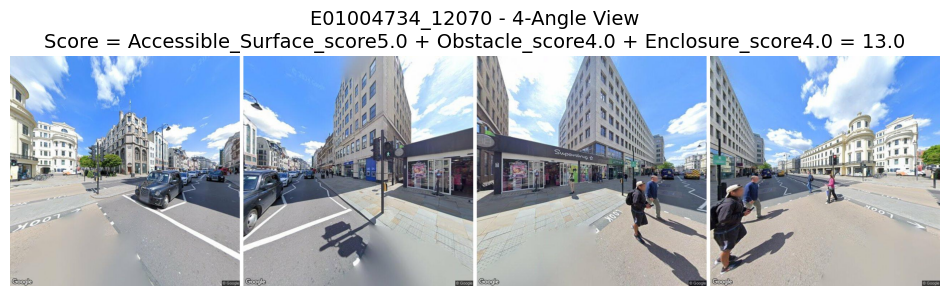

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = "/content/drive/MyDrive/GEOG0105/Output_1/Validation/GSV_val_360_4views/E01004734_12070.jpg"

filename = image_path.split("/")[-1]
lsoa, gid = filename.replace(".jpg", "").split("_")

row = validation_samples[(validation_samples["id"] == int(gid)) & (validation_samples["lsoa21cd"] == lsoa)]

if not row.empty:
    a = row["Accessible_Surface_score"].values[0]
    b = row["Obstacle_score"].values[0]
    c = row["Enclosure_score"].values[0]
    score_sum = a + b + c
    label = f"Score = Accessible_Surface_score{a:.1f} + Obstacle_score{b:.1f} + Enclosure_score{c:.1f} = {score_sum:.1f}"
else:
    label = "Score not found"

img = Image.open(image_path)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis("off")
plt.title(f"{lsoa}_{gid} - 4-Angle View\n{label}", fontsize=14)
plt.show()


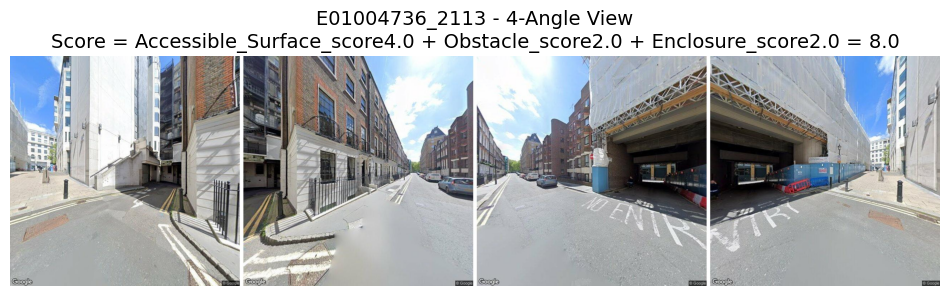

In [ ]:

image_path = "/content/drive/MyDrive/GEOG0105/Output_1/Validation/GSV_val_360_4views/E01004736_2113.jpg"

filename = image_path.split("/")[-1]
lsoa, gid = filename.replace(".jpg", "").split("_")

row = validation_samples[(validation_samples["id"] == int(gid)) & (validation_samples["lsoa21cd"] == lsoa)]

if not row.empty:
    a = row["Accessible_Surface_score"].values[0]
    b = row["Obstacle_score"].values[0]
    c = row["Enclosure_score"].values[0]
    score_sum = a + b + c
    label = f"Score = Accessible_Surface_score{a:.1f} + Obstacle_score{b:.1f} + Enclosure_score{c:.1f} = {score_sum:.1f}"
else:
    label = "Score not found"

img = Image.open(image_path)
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis("off")
plt.title(f"{lsoa}_{gid} - 4-Angle View\n{label}", fontsize=14)
plt.show()

In [ ]:
# Import validation points
validation_points = pd.read_csv("/content/drive/MyDrive/GEOG0105/Output_1/Validation/validation_points.csv")
print(validation_points.info())
validation_points.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                80 non-null     int64  
 1   id                        80 non-null     int64  
 2   Accessible_Surface_mean   80 non-null     float64
 3   Accessible_Surface_std    80 non-null     float64
 4   Obstacle_mean             80 non-null     float64
 5   Obstacle_std              80 non-null     float64
 6   Greenery_mean             80 non-null     float64
 7   Greenery_std              80 non-null     float64
 8   Street_Facilities_mean    80 non-null     float64
 9   Street_Facilities_std     80 non-null     float64
 10  Vertical_Obstacle_mean    80 non-null     float64
 11  Vertical_Obstacle_std     80 non-null     float64
 12  Elevation_Change_mean     80 non-null     float64
 13  Elevation_Change_std      80 non-null     float64
 14  Building_mea

,Unnamed: 0,id,Accessible_Surface_mean,Accessible_Surface_std,Obstacle_mean,Obstacle_std,Greenery_mean,Greenery_std,Street_Facilities_mean,Street_Facilities_std,...,Building_mean,Building_std,Overhead_mean,Overhead_std,Accessible_Surface_score,Obstacle_combo,Obstacle_score,Enclosure_combo,Enclosure_score,lsoa21cd
0,0,7205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006553,0.007485,...,0.000000,0.000000,0.000000,0.00000,1,0.000371,5,0.002184,1,E01000002
1,1,675,0.377939,0.052821,0.010234,0.002379,0.003516,0.002817,0.004697,0.007928,...,0.002197,0.003733,0.000000,0.00000,3,0.124414,5,0.003470,1,E01000002
2,2,9712,0.076797,0.082355,0.012305,0.006557,0.017852,0.021450,0.000557,0.000929,...,0.000156,0.000165,0.000000,0.00000,1,0.400254,2,0.006188,1,E01000005
3,3,1518,0.284150,0.173012,0.000879,0.001130,0.000000,0.000000,0.000010,0.000017,...,0.061533,0.107661,0.000000,0.00000,2,0.157061,5,0.020514,1,E01000005
4,4,29195,0.452119,0.008376,0.029033,0.016717,0.036719,0.032554,0.000117,0.000145,...,0.159717,0.046908,0.016738,0.01687,5,0.347412,3,0.065518,3,E01000850
